### Problem Statements:


### Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Reading the CSV file

In [2]:
bank=pd.read_csv(r'E:\DS Assigment\Logistic Regression\bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
#Finding the list of columns having missing values.
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Checking shape


In [5]:
bank.shape

(45211, 17)

## Checking Null Value


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

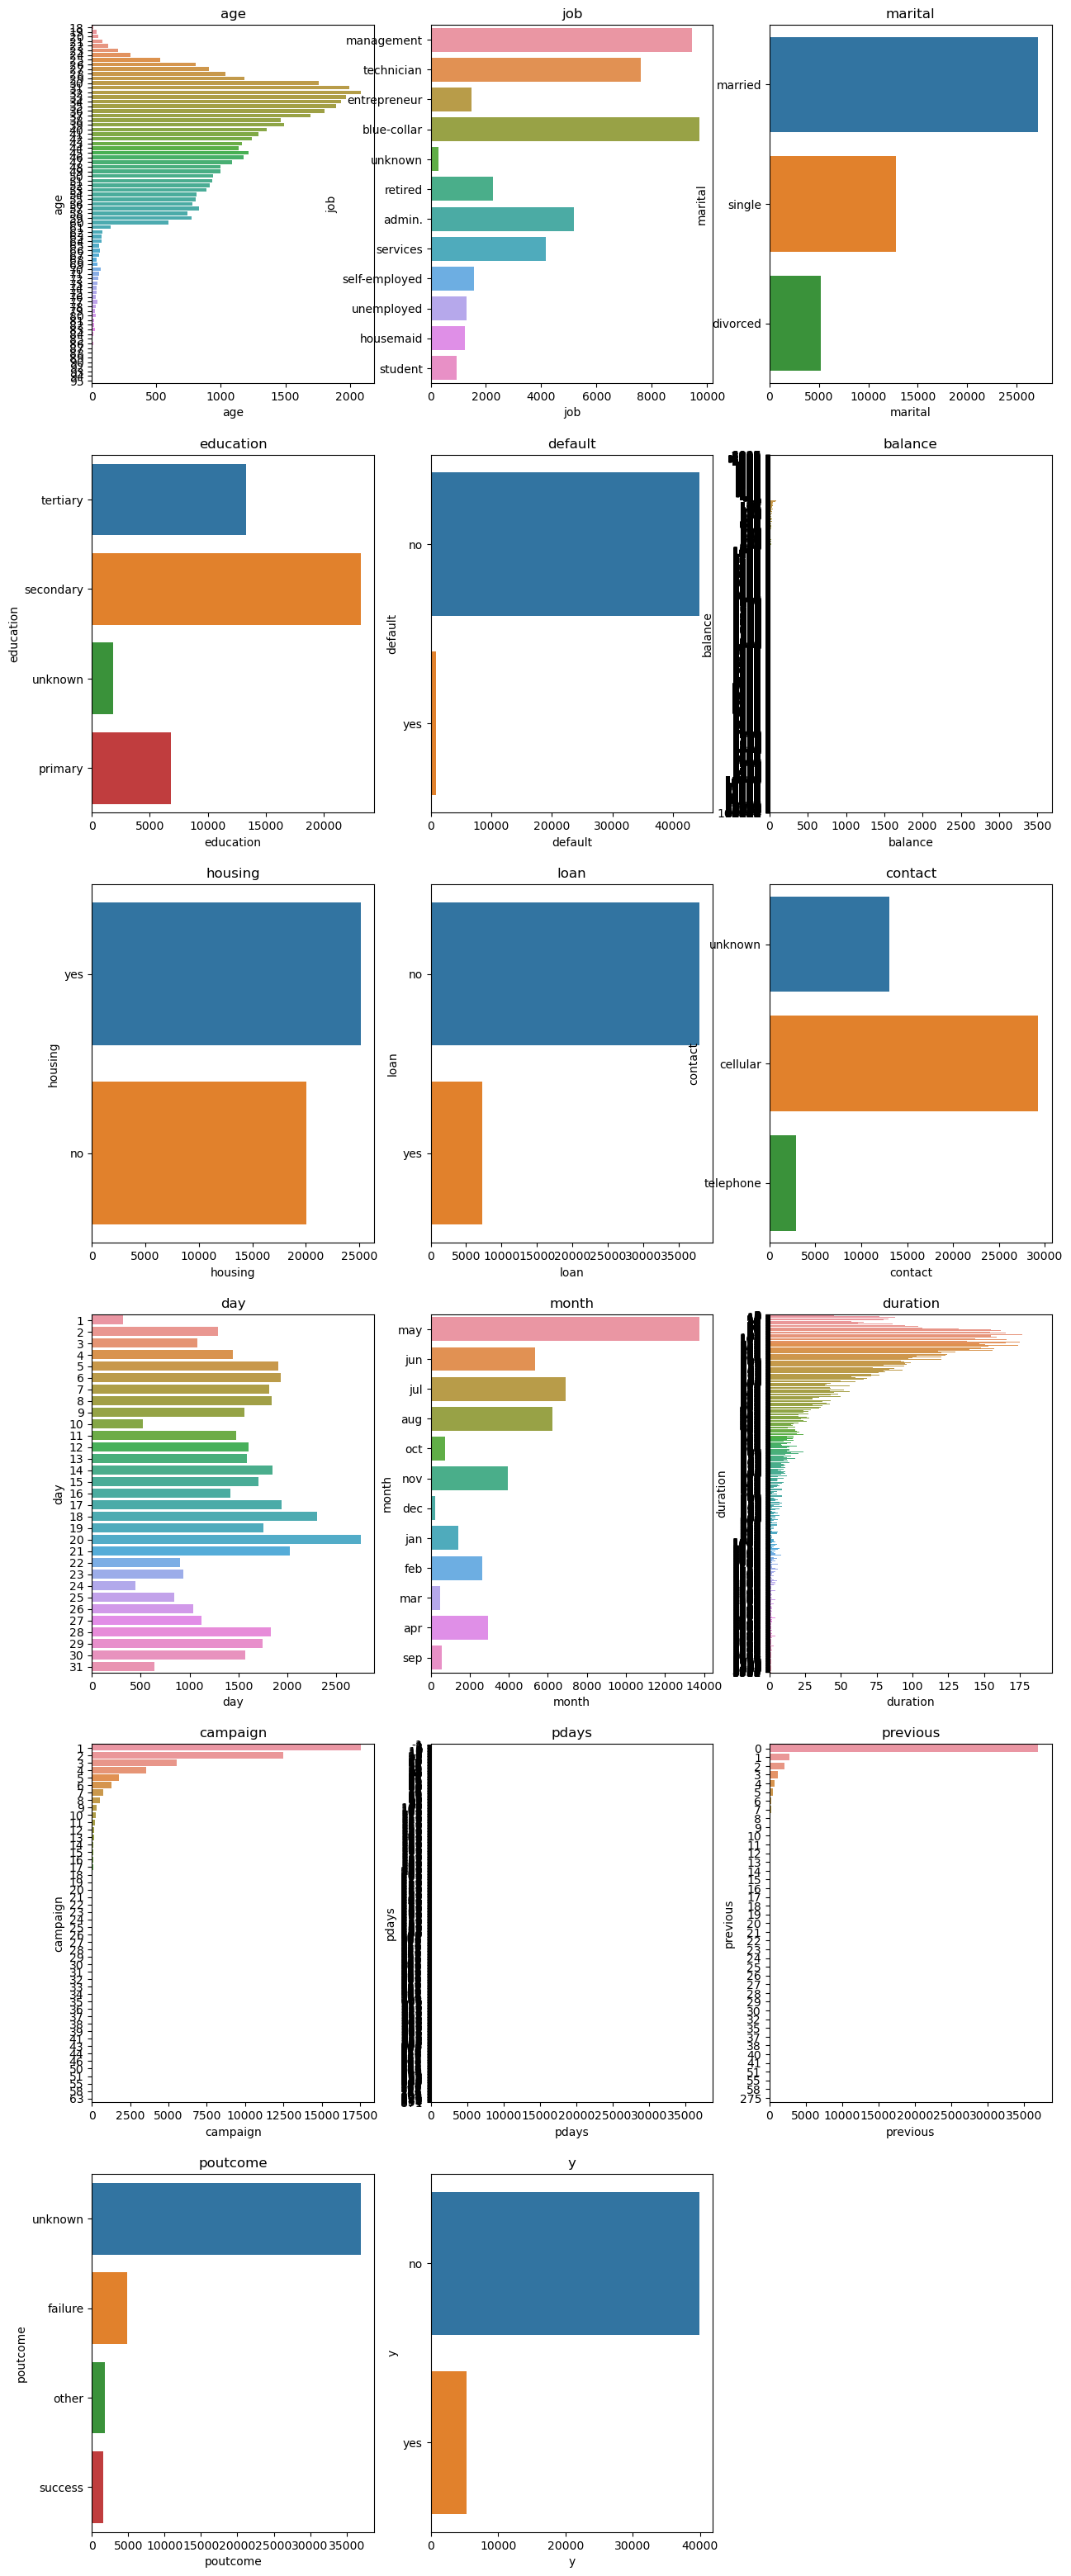

In [8]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber=1
for categorical_feature in bank:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()  

Here we observed the following: -

Job: 
Maximum number of clients work in Blue-color job.
Second most number of clients work in Management job.
Clients who are student or house maid or unemployed are relatively very less in the dataset.

Maritial: 
Maximum number of clients are married.
Minimum number of clients are divorced.

Education:
Maximum number of clients have completed Secondary education.

Default:
Almost all clients in the dataset have no credit default.

Loan:
Maximum number of clients do not have a personal loan.

Contact:
Maximum number of clients were contacted via cellular method.

Month:
Most number of contacts were carried out in the month of May.
Lest number of contacts were carried out in the month of December.

Poutcome:
For maximum number of clients outcome of previous marketing campaign is unknown.
Number of failures are higher when compared to success in the results of previous marketing campaign.

<AxesSubplot:xlabel='y', ylabel='count'>

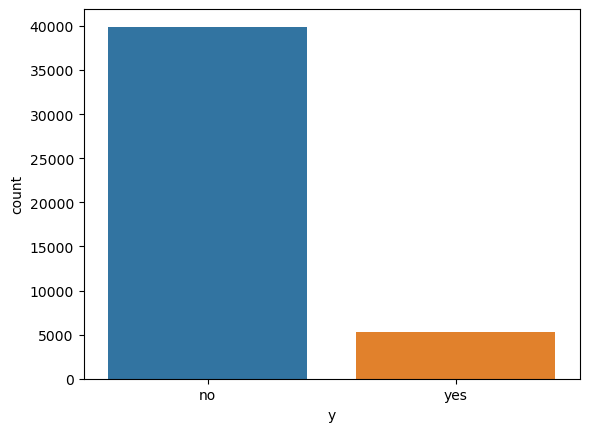

In [9]:
sns.countplot(x='y',data=bank)

Text(0, 0.5, 'Frequency of Purchase')

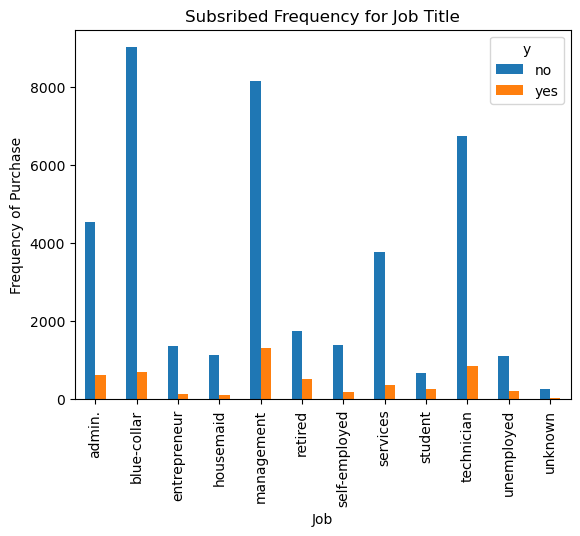

In [10]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subsribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

# Inference from the above graph:

All occupations have different type of subscription to term deposit and so this is an important feature.

Text(0, 0.5, 'Proportion of Customers')

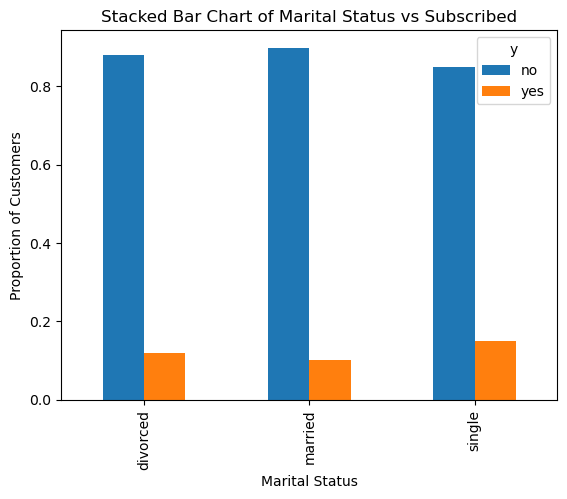

In [11]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

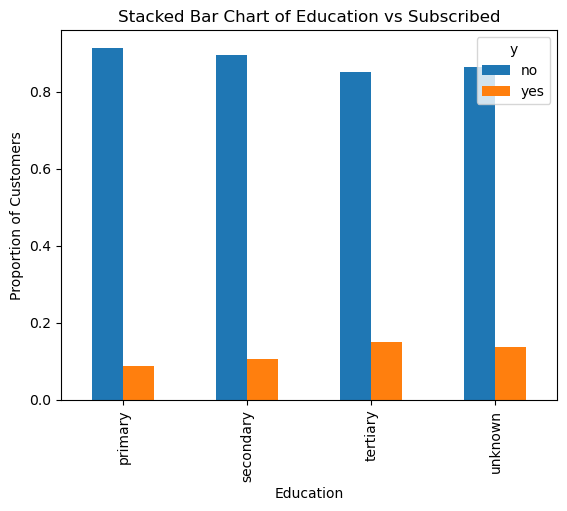

In [12]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Subsribe')

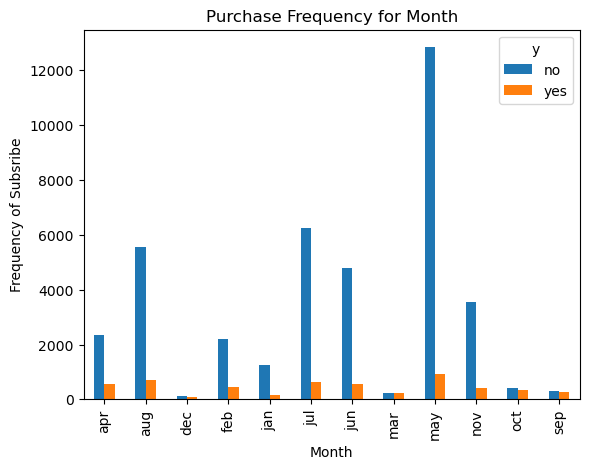

In [13]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')

## People tend to get term deposit mostly in the month of may

# Checking for outliers, with boxplot:

<AxesSubplot:title={'center':'age'}, xlabel='y'>

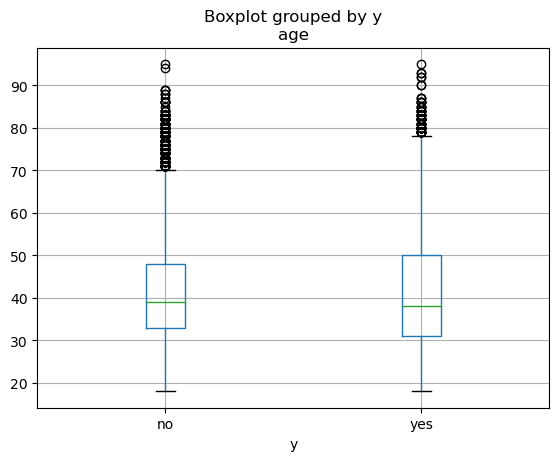

In [14]:
bank.boxplot(column='age', by='y')

Text(0, 0.5, 'Frequency of Subscribe')

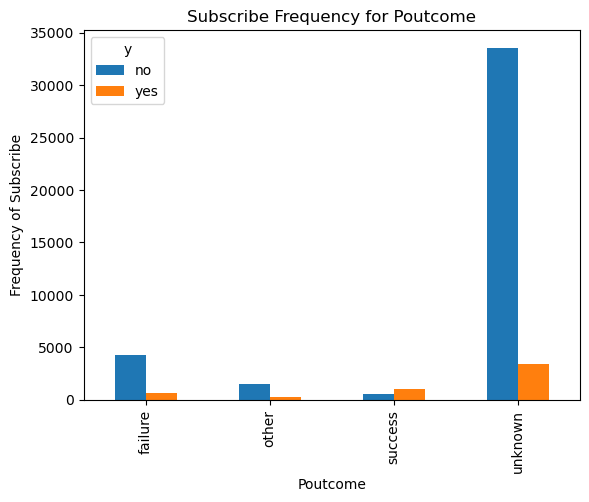

In [15]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')

# Thus, dropping all the unimportant features form the data, before constructing a model.

In [16]:
bank.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [17]:
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


### We will create dummy variable for categorical data

In [18]:
contactd=pd.get_dummies(bank['contact'],drop_first=True)

In [19]:
jobd=pd.get_dummies(bank['job'],drop_first=True)

In [20]:
poutcomed=pd.get_dummies(bank['poutcome'],drop_first=True)

In [21]:
defaultd = pd.get_dummies(bank['default'],drop_first=True)

In [22]:
bank = pd.concat([bank,defaultd,poutcomed,jobd,contactd],axis=1)
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


### We will drop the exist categorical columns for whome we have make dummy variable

In [23]:
bank.drop(['default','poutcome','job',"contact"],axis=1,inplace = True)
bank.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [24]:
bank_new= bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


## Seperating the independent and depenedent/Target variable, before contructing a model

In [25]:
X = bank.drop("y",axis=1)
Y = bank["y"]

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

#### Predicting for the built model:

In [27]:
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

array([[0.97641748, 0.02358252],
       [0.98507801, 0.01492199],
       [0.99002757, 0.00997243],
       ...,
       [0.00853515, 0.99146485],
       [0.88227339, 0.11772661],
       [0.87908926, 0.12091074]])

## Evaluation metrics to identify the missclassified classes using confusion matrix and find the accuracy of the prediction:

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print (cm,accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


### Accuracy of the model is 90% it is good.

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



# ROC Curve

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
y_predict= label_encoder.fit_transform(y_pred) 

y_actual= label_encoder.fit_transform(bank_new['y']) 

Text(0, 0.5, 'True Positive Rate')

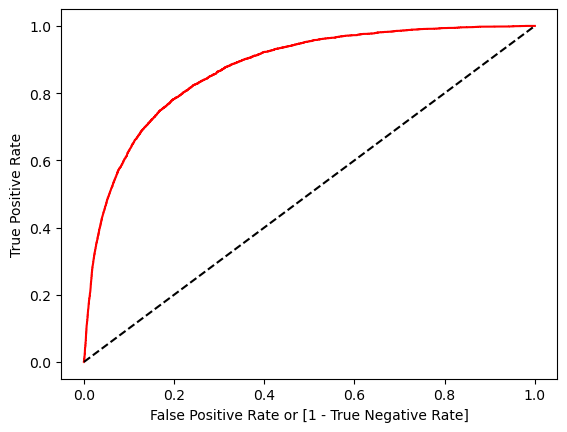

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [32]:
auc

0.6477134406230929

# Conclusion:

### EDA is performed and a model is constructed only by considering the required and features that significantly contribute to the client subscribing to the term deposit.

#### From the ROC curve, it is evident that, the area under curve is 64.8%, which means that by an approximation of 65%, it can be used to predict the true positive rate. It is baised beacuse, the dataset has been a large frequency of negative results.

#### The precision, senstivity (true positive rate), Specificity (true negative rate ) and F1-score are also biased because the dataset has a large frequency of negative result.

 precision - no (0.92) and yes ( 0.65 )
recall - no (0.98) and yes ( 0.32 )

f1-score - no (0.95) and yes ( 0.43 )

support - no ( 39922) and yes ( 5289 )


## Thus, the created model gives 90% accurate prediction for the client to subscribe the term deposit.